In [1]:
import sys

sys.path.append("../..")

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
# all envs

from environment.deepqlearning.exploration_env import ExplorationEnv
from utils.reader import get_yaml_path, read_file

In [4]:
server_address = "localhost:50051"
client_name = "RLClient"
env = ExplorationEnv(server_address, client_name) #, grid_size=(10, 10))
env.connect_to_client()

2026-01-14 11:48:09,630 — INFO — ✓ Connected to localhost:50051



In [5]:
config_path = get_yaml_path("src", "scripts", "resources", "generated", "environment", "dq-learning", "10x10", "environment_0000.yml")

config = read_file(config_path)

In [6]:
env.init(config)

(True, '')

In [7]:
from agent.scala_dqagent import DQAgent
from training.dqnetwork import DQNetwork

In [8]:
neuron_count_per_hidden_layer = [128, 64, 32]

In [9]:
agent1 = DQAgent(
    env,
    agent_id="00000000-0000-0000-0000-000000000001",
    action_model=DQNetwork(
        env.observation_space.shape,
        neuron_count_per_hidden_layer,
        env.action_space.n,
        summary=False,
    ),
    target_model=DQNetwork(
        env.observation_space.shape,
        neuron_count_per_hidden_layer,
        env.action_space.n,
        summary=False,
    ),
)
agents = [agent1]

In [10]:
path = get_yaml_path("src", "scripts", "resources", "generated", "exploration", "dq-learning", "final-2", "checkpoints_final")
for agent in agents:
    agent.load(path)

C:\Users\HP\Desktop\UNIBO\LaureaMagistrale\1_anno\Paradigmi di Programmazione e Sviluppo (PPS)\Esame\PPS-22-srs\python\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
import time

from training.multi_agent_dqlearning import DQLearning

trainer = DQLearning(
    env,
    agents,
    configs = [],
)

In [12]:
trainer.play_with_pygame(fps=60)

2026-01-14 11:51:38,946 — INFO — Episode 1/1 - Reward: 1446.4064466246266


In [1]:
import sys
sys.path.append("../..")

import nest_asyncio
nest_asyncio.apply()

from tqdm import trange

from utils.reader import get_yaml_path, read_file
from utils.dict import rename_inner_keys, combine_inner_dict

from evaluation.agent_evaluation import evaluate

from utils.plotting import plot_all_q_agent, plot_all


from environment.deepqlearning.exploration_env import ExplorationEnv as DQExplorationEnv
from agent.scala_dqagent import DQAgent
from training.dqnetwork import DQNetwork


server_address = "localhost:50051"
client_name = "RLClient"
dq_env = DQExplorationEnv(server_address, client_name)
dq_env.connect_to_client()


dq_init_env_path = get_yaml_path("src", "scripts", "resources", "generated", "evaluation", "dq-learning", "exploration", "10x10", "environment_0000.yml")
dq_init_env = read_file(dq_init_env_path)
dq_env.init(dq_init_env)
neuron_count_per_hidden_layer = [128, 64, 32]
dq_agent_id = "00000000-0000-0000-0000-000000000001"
dq_agent = DQAgent(
    dq_env,
    agent_id=dq_agent_id,
    action_model=DQNetwork(
        dq_env.observation_space.shape,
        neuron_count_per_hidden_layer,
        dq_env.action_space.n,
        summary=False,
    ),
    target_model=DQNetwork(
        dq_env.observation_space.shape,
        neuron_count_per_hidden_layer,
        dq_env.action_space.n,
        summary=False,
    ),
)
dq_agents = {dq_agent_id: dq_agent}


path = get_yaml_path("src", "scripts", "resources", "generated", "exploration", "dq-learning", "10x10l408", "checkpoints_ep3081")
dq_agent.load(path)
print("DQ-Agent hyperparameters:")
print(f"\tEpsilon-max: {dq_agent.epsilon_max}")
print(f"\tEpsilon-min: {dq_agent.epsilon_min}")
print(f"\tGamma: {dq_agent.gamma}")
print(f"\tReplay memory max size: {dq_agent.replay_memory.maxlen}")
print(f"\tSteps per update: {dq_agent.step_per_update}")
print(f"\tSteps per update target model: {dq_agent.step_per_update_target_model}")


# 5x5 configurations
dq_config_5_path = get_yaml_path("src", "scripts", "resources", "generated", "evaluation", "dq-learning", "exploration", "5x5")
dq_yml_files_5 = sorted(dq_config_5_path.glob("*.yml"), key=lambda p: p.name)
dq_configs_5 = [read_file(yml) for yml in dq_yml_files_5]

# 10x10 configurations
dq_config_10_path = get_yaml_path("src", "scripts", "resources", "generated", "evaluation", "dq-learning", "exploration", "10x10")
dq_yml_files_10 = sorted(dq_config_10_path.glob("*.yml"), key=lambda p: p.name)
dq_configs_10 = [read_file(yml) for yml in dq_yml_files_10]

# 20x20 configurations
dq_config_20_path = get_yaml_path("src", "scripts", "resources", "generated", "evaluation", "dq-learning", "exploration", "20x20")
dq_yml_files_20 = sorted(dq_config_20_path.glob("*.yml"), key=lambda p: p.name)
dq_configs_20 = [read_file(yml) for yml in dq_yml_files_20]

# 30x30 configurations
dq_config_30_path = get_yaml_path("src", "scripts", "resources", "generated", "evaluation", "dq-learning", "exploration", "30x30")
dq_yml_files_30 = sorted(dq_config_30_path.glob("*.yml"), key=lambda p: p.name)
dq_configs_30 = [read_file(yml) for yml in dq_yml_files_30]

2026-01-14 13:10:55,330 — INFO — ✓ Connected to localhost:50051

explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ra

C:\Users\HP\Desktop\UNIBO\LaureaMagistrale\1_anno\Paradigmi di Programmazione e Sviluppo (PPS)\Esame\PPS-22-srs\python\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Evaluation:   0%|          | 0/2 [00:00<?, ?configuration run/s]

explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_rati

Evaluation:  50%|█████     | 1/2 [00:10<00:10, 10.15s/configuration run]

explored_ratio: 0.16
explored_ratio: 0.16
explored_ratio: 0.16
explored_ratio: 0.2
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.04
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio: 0.08
explored_ratio

Evaluation: 100%|██████████| 2/2 [00:17<00:00,  8.89s/configuration run]

explored_ratio: 0.16
explored_ratio: 0.16
explored_ratio: 0.2


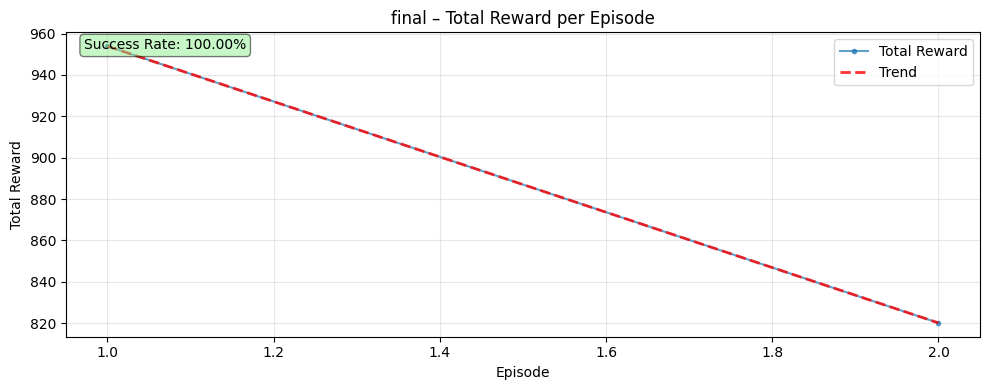

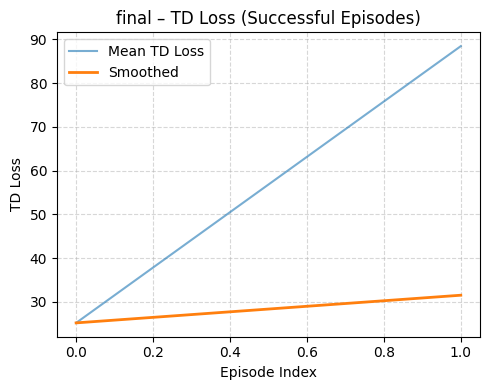

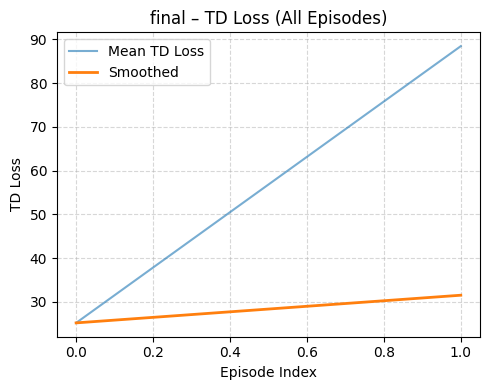

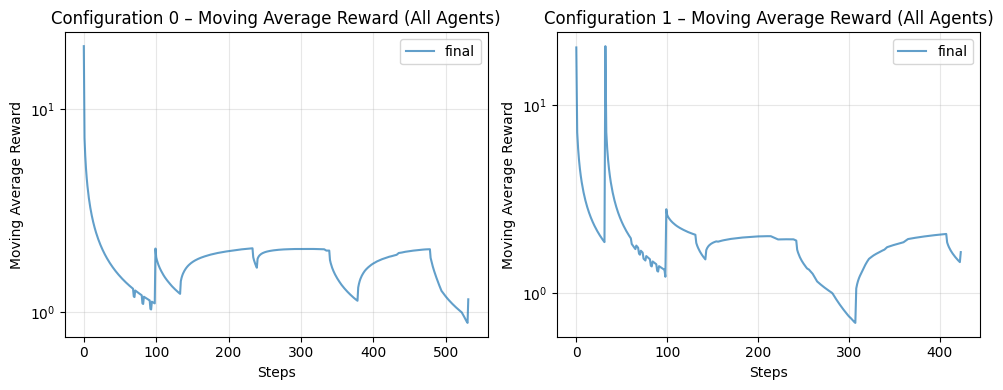

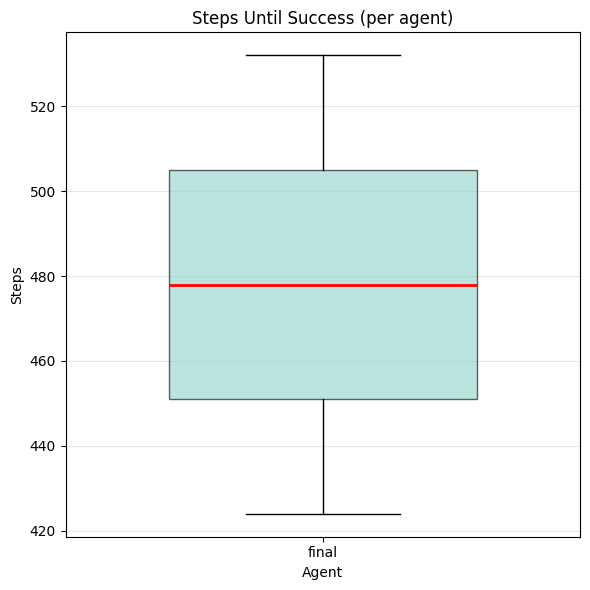

In [2]:
did_succeed = lambda reward, termination, truncation, info: info.get("explored_ratio", 0) >= 0.20

dq_final_results_5 = evaluate(env=dq_env, agents=dq_agents, configs=dq_configs_5[:2], max_steps=10000, did_succeed=did_succeed)
# dq_final_results_10 = evaluate(env=dq_env, agents=dq_agents, configs=dq_configs_10, max_steps=20000, did_succeed=did_succeed)
# dq_final_results_20 = evaluate(env=dq_env, agents=dq_agents, configs=dq_configs_20, max_steps=30000, did_succeed=did_succeed)
# dq_final_results_30 = evaluate(env=dq_env, agents=dq_agents, configs=dq_configs_30, max_steps=40000, did_succeed=did_succeed)

dq_final_results_5 = rename_inner_keys(dq_final_results_5, {dq_agent_id: "final"})
# dq_final_results_10 = rename_inner_keys(dq_final_results_10, {dq_agent_id: "final"})
# dq_final_results_20 = rename_inner_keys(dq_final_results_20, {dq_agent_id: "final"})
# dq_final_results_30 = rename_inner_keys(dq_final_results_30, {dq_agent_id: "final"})

plot_all(dq_final_results_5, agents=["final"])
# plot_all(dq_final_results_10, agents=["final"])
# plot_all(dq_final_results_20, agents=["final"])
# plot_all(dq_final_results_30, agents=["final"])